In [2]:
%matplotlib inline

2 clusters for 3063.jpg
2 clusters for 35070.jpg
2 clusters for 23084.jpg
2 clusters for 368037.jpg


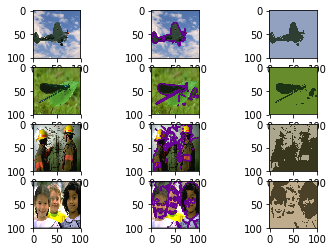

In [24]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import cv2


images = ["3063.jpg", "35070.jpg", "23084.jpg", "368037.jpg"]

new_size = (100, 100)
temp = np.arange(1, new_size[0] + 1, dtype=np.int32)
x_mesh, y_mesh = np.meshgrid(temp, temp)
mesh = np.stack((x_mesh, y_mesh), axis=-1)
reshaped_mesh = mesh.reshape((-1, 2))
image_ind = 0

for image_name in images:
    img = cv2.imread(image_name)
    resized_img = cv2.resize(img, new_size)

    reshaped_img = resized_img.reshape((-1, 3))
    max_score = -1

    for no_of_clusters in range(2, 10):
        ac = AgglomerativeClustering(n_clusters=no_of_clusters)

        X = np.empty((reshaped_img.shape[0], 5), dtype=np.int64)
        for i in range(reshaped_img.shape[0]):
            X[i] = np.concatenate((reshaped_img[i], reshaped_mesh[i]))

        res = ac.fit_predict(X)

        score = silhouette_score(X, res)
        if score >= max_score:
            max_score = score
            max_res = res
            max_no_of_clusters = no_of_clusters

    print(max_no_of_clusters, "clusters for", image_name)
    val = np.zeros((max_no_of_clusters, 3), dtype=np.int64)
    cnt = np.zeros(max_no_of_clusters)
    for i in range(reshaped_img.shape[0]):
        val[max_res[i]] += reshaped_img[i]
        cnt[max_res[i]] += 1

    for i in range(max_no_of_clusters):
        val[i] = val[i] // cnt[i]

    final_res = np.empty((max_res.shape[0], 3), dtype=np.uint8)
    for i in range(max_res.shape[0]):
        final_res[i] = val[max_res[i]]

    final_res = final_res.reshape((new_size[0], new_size[1], 3))
    max_res = max_res.reshape(new_size)

    plt.subplot(len(images), 3, 3 * image_ind + 1)
    plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
    plt.subplot(len(images), 3, 3 * image_ind + 2)
    plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
    for i in range(max_no_of_clusters):
        plt.contour(max_res == i, colors=[plt.cm.nipy_spectral(i / float(no_of_clusters))], linewidths=0.5)
    plt.subplot(len(images), 3, 3 * image_ind + 3)
    plt.imshow(cv2.cvtColor(final_res, cv2.COLOR_BGR2RGB))
    image_ind += 1

plt.savefig("AglomerativeClustering.jpg")
plt.show()

3 clusters for 3063.jpg
2 clusters for 35070.jpg
2 clusters for 23084.jpg
2 clusters for 368037.jpg


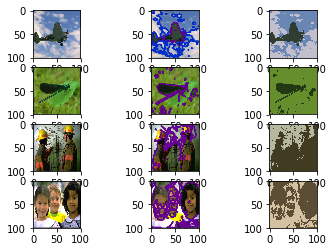

In [25]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import cv2


images = ["3063.jpg", "35070.jpg", "23084.jpg", "368037.jpg"]

new_size = (100, 100)
temp = np.arange(1, new_size[0] + 1, dtype=np.int32)
x_mesh, y_mesh = np.meshgrid(temp, temp)
mesh = np.stack((x_mesh, y_mesh), axis=-1)
reshaped_mesh = mesh.reshape((-1, 2))
image_ind = 0

for image_name in images:
    img = cv2.imread(image_name)
    resized_img = cv2.resize(img, new_size)

    reshaped_img = resized_img.reshape((-1, 3))
    max_score = -1

    for no_of_clusters in range(2, 10):
        kmeans = KMeans(n_clusters=no_of_clusters)

        X = np.empty((reshaped_img.shape[0], 5), dtype=np.int64)
        for i in range(reshaped_img.shape[0]):
            X[i] = np.concatenate((reshaped_img[i], reshaped_mesh[i]))

        res = kmeans.fit_predict(X)

        score = silhouette_score(X, res)
        if score >= max_score:
            max_score = score
            max_res = res
            max_no_of_clusters = no_of_clusters

    print(max_no_of_clusters, "clusters for", image_name)
    val = np.zeros((max_no_of_clusters, 3), dtype=np.int64)
    cnt = np.zeros(max_no_of_clusters)
    for i in range(reshaped_img.shape[0]):
        val[max_res[i]] += reshaped_img[i]
        cnt[max_res[i]] += 1

    for i in range(max_no_of_clusters):
        val[i] = val[i] // cnt[i]

    final_res = np.empty((max_res.shape[0], 3), dtype=np.uint8)
    for i in range(max_res.shape[0]):
        final_res[i] = val[max_res[i]]

    final_res = final_res.reshape((new_size[0], new_size[1], 3))
    max_res = max_res.reshape(new_size)

    plt.subplot(len(images), 3, 3 * image_ind + 1)
    plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
    plt.subplot(len(images), 3, 3 * image_ind + 2)
    plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
    for i in range(max_no_of_clusters):
        plt.contour(max_res == i, colors=[plt.cm.nipy_spectral(i / float(no_of_clusters))], linewidths=0.5)
    plt.subplot(len(images), 3, 3 * image_ind + 3)
    plt.imshow(cv2.cvtColor(final_res, cv2.COLOR_BGR2RGB))
    image_ind += 1

plt.savefig("KMeans.jpg")
plt.show()

2 clusters for 3063.jpg
2 clusters for 35070.jpg
2 clusters for 23084.jpg
2 clusters for 368037.jpg


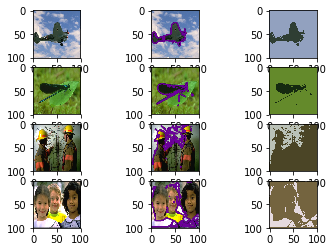

In [26]:
from sklearn.cluster import Birch
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import cv2


images = ["3063.jpg", "35070.jpg", "23084.jpg", "368037.jpg"]

new_size = (100, 100)
temp = np.arange(1, new_size[0] + 1, dtype=np.int32)
x_mesh, y_mesh = np.meshgrid(temp, temp)
mesh = np.stack((x_mesh, y_mesh), axis=-1)
reshaped_mesh = mesh.reshape((-1, 2))
image_ind = 0

for image_name in images:
    img = cv2.imread(image_name)
    resized_img = cv2.resize(img, new_size)

    reshaped_img = resized_img.reshape((-1, 3))
    max_score = -1

    for no_of_clusters in range(2, 10):
        bch = Birch(threshold=0.5, branching_factor=50, n_clusters=no_of_clusters, copy=True, compute_labels=True)

        X = np.empty((reshaped_img.shape[0], 5), dtype=np.int64)
        for i in range(reshaped_img.shape[0]):
            X[i] = np.concatenate((reshaped_img[i], reshaped_mesh[i]))

        res = bch.fit_predict(X)

        score = silhouette_score(X, res)
        if score >= max_score:
            max_score = score
            max_res = res
            max_no_of_clusters = no_of_clusters

    print(max_no_of_clusters, "clusters for", image_name)
    val = np.zeros((max_no_of_clusters, 3), dtype=np.int64)
    cnt = np.zeros(max_no_of_clusters)
    for i in range(reshaped_img.shape[0]):
        val[max_res[i]] += reshaped_img[i]
        cnt[max_res[i]] += 1

    for i in range(max_no_of_clusters):
        val[i] = val[i] // cnt[i]

    final_res = np.empty((max_res.shape[0], 3), dtype=np.uint8)
    for i in range(max_res.shape[0]):
        final_res[i] = val[max_res[i]]

    final_res = final_res.reshape((new_size[0], new_size[1], 3))
    max_res = max_res.reshape(new_size)

    plt.subplot(len(images), 3, 3 * image_ind + 1)
    plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
    plt.subplot(len(images), 3, 3 * image_ind + 2)
    plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
    for i in range(max_no_of_clusters):
        plt.contour(max_res == i, colors=[plt.cm.nipy_spectral(i / float(no_of_clusters))], linewidths=0.5)
    plt.subplot(len(images), 3, 3 * image_ind + 3)
    plt.imshow(cv2.cvtColor(final_res, cv2.COLOR_BGR2RGB))
    image_ind += 1

plt.savefig("Birch.jpg")
plt.show()

2 clusters for 3063.jpg
2 clusters for 35070.jpg
3 clusters for 23084.jpg
2 clusters for 368037.jpg


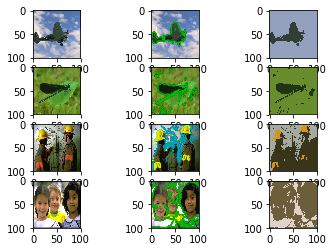

In [7]:
from sklearn.cluster import MeanShift
import matplotlib.pyplot as plt
import numpy as np
import cv2


images = ["3063.jpg", "35070.jpg", "23084.jpg", "368037.jpg"]

new_size = (100, 100)
temp = np.arange(1, new_size[0] + 1, dtype=np.int32)
x_mesh, y_mesh = np.meshgrid(temp, temp)
mesh = np.stack((x_mesh, y_mesh), axis=-1)
reshaped_mesh = mesh.reshape((-1, 2))
image_ind = 0

for image_name in images:
    img = cv2.imread(image_name)
    resized_img = cv2.resize(img, new_size)

    reshaped_img = resized_img.reshape((-1, 3))

    ms = MeanShift()

    X = np.empty((reshaped_img.shape[0], 5), dtype=np.int64)
    for i in range(reshaped_img.shape[0]):
        X[i] = np.concatenate((reshaped_img[i], reshaped_mesh[i]))

    res = ms.fit_predict(X)
    no_of_clusters = max(res) + 1
    
    print(no_of_clusters, "clusters for", image_name)
    val = np.zeros((no_of_clusters, 3), dtype=np.int64)
    cnt = np.zeros(no_of_clusters)
    for i in range(reshaped_img.shape[0]):
        val[res[i]] += reshaped_img[i]
        cnt[res[i]] += 1

    for i in range(no_of_clusters):
        val[i] = val[i] // cnt[i]

    final_res = np.empty((res.shape[0], 3), dtype=np.uint8)
    for i in range(res.shape[0]):
        final_res[i] = val[res[i]]

    final_res = final_res.reshape((new_size[0], new_size[1], 3))
    res = res.reshape(new_size)

    plt.subplot(len(images), 3, 3 * image_ind + 1)
    plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
    plt.subplot(len(images), 3, 3 * image_ind + 2)
    plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
    for i in range(no_of_clusters):
        plt.contour(res == i, colors=[plt.cm.nipy_spectral(i / float(no_of_clusters))], linewidths=0.5)
    plt.subplot(len(images), 3, 3 * image_ind + 3)
    plt.imshow(cv2.cvtColor(final_res, cv2.COLOR_BGR2RGB))
    image_ind += 1

plt.savefig("MeanShift.jpg")
plt.show()

3 clusters for 3063.jpg
2 clusters for 35070.jpg
2 clusters for 23084.jpg
2 clusters for 368037.jpg


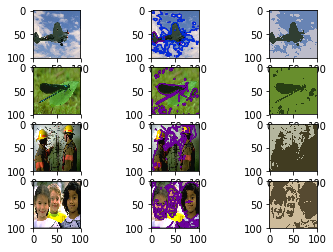

In [27]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import cv2


images = ["3063.jpg", "35070.jpg", "23084.jpg", "368037.jpg"]

new_size = (100, 100)
temp = np.arange(1, new_size[0] + 1, dtype=np.int32)
x_mesh, y_mesh = np.meshgrid(temp, temp)
mesh = np.stack((x_mesh, y_mesh), axis=-1)
reshaped_mesh = mesh.reshape((-1, 2))
image_ind = 0

for image_name in images:
    img = cv2.imread(image_name)
    resized_img = cv2.resize(img, new_size)

    reshaped_img = resized_img.reshape((-1, 3))
    max_score = -1

    for no_of_clusters in range(2, 10):
        mbkm = MiniBatchKMeans(n_clusters=no_of_clusters, max_iter=600)

        X = np.empty((reshaped_img.shape[0], 5), dtype=np.int64)
        for i in range(reshaped_img.shape[0]):
            X[i] = np.concatenate((reshaped_img[i], reshaped_mesh[i]))

        res = mbkm.fit_predict(X)

        score = silhouette_score(X, res)
        if score >= max_score:
            max_score = score
            max_res = res
            max_no_of_clusters = no_of_clusters

    print(max_no_of_clusters, "clusters for", image_name)
    val = np.zeros((max_no_of_clusters, 3), dtype=np.int64)
    cnt = np.zeros(max_no_of_clusters)
    for i in range(reshaped_img.shape[0]):
        val[max_res[i]] += reshaped_img[i]
        cnt[max_res[i]] += 1

    for i in range(max_no_of_clusters):
        val[i] = val[i] // cnt[i]

    final_res = np.empty((max_res.shape[0], 3), dtype=np.uint8)
    for i in range(max_res.shape[0]):
        final_res[i] = val[max_res[i]]

    final_res = final_res.reshape((new_size[0], new_size[1], 3))
    max_res = max_res.reshape(new_size)

    plt.subplot(len(images), 3, 3 * image_ind + 1)
    plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
    plt.subplot(len(images), 3, 3 * image_ind + 2)
    plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
    for i in range(max_no_of_clusters):
        plt.contour(max_res == i, colors=[plt.cm.nipy_spectral(i / float(no_of_clusters))], linewidths=0.5)
    plt.subplot(len(images), 3, 3 * image_ind + 3)
    plt.imshow(cv2.cvtColor(final_res, cv2.COLOR_BGR2RGB))
    image_ind += 1

plt.savefig("MiniBatchKMeans.jpg")
plt.show()

7 clusters for 3063.jpg
11 clusters for 35070.jpg
27 clusters for 23084.jpg
39 clusters for 368037.jpg


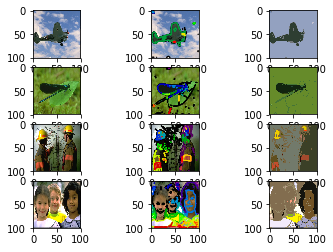

In [4]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import cv2


images = ["3063.jpg", "35070.jpg", "23084.jpg", "368037.jpg"]

new_size = (100, 100)
temp = np.arange(1, new_size[0] + 1, dtype=np.int32)
x_mesh, y_mesh = np.meshgrid(temp, temp)
mesh = np.stack((x_mesh, y_mesh), axis=-1)
reshaped_mesh = mesh.reshape((-1, 2))
image_ind = 0

for image_name in images:
    img = cv2.imread(image_name)
    resized_img = cv2.resize(img, new_size)

    reshaped_img = resized_img.reshape((-1, 3))
    max_score = -1

    for no_of_clusters in range(2, 10):
        ds = DBSCAN(eps=12.0, min_samples=10)

        X = np.empty((reshaped_img.shape[0], 5), dtype=np.int64)
        for i in range(reshaped_img.shape[0]):
            X[i] = np.concatenate((reshaped_img[i], reshaped_mesh[i]))

        res = ds.fit_predict(X)
        no_of_clusters = max(res) + 1

        score = silhouette_score(X, res)
        if score >= max_score:
            max_score = score
            max_res = res
            max_no_of_clusters = no_of_clusters

    print(max_no_of_clusters, "clusters for", image_name)
    val = np.zeros((max_no_of_clusters, 3), dtype=np.int64)
    cnt = np.zeros(max_no_of_clusters)
    for i in range(reshaped_img.shape[0]):
        val[max_res[i]] += reshaped_img[i]
        cnt[max_res[i]] += 1

    for i in range(max_no_of_clusters):
        val[i] = val[i] // cnt[i]

    final_res = np.empty((max_res.shape[0], 3), dtype=np.uint8)
    for i in range(max_res.shape[0]):
        final_res[i] = val[max_res[i]]

    final_res = final_res.reshape((new_size[0], new_size[1], 3))
    max_res = max_res.reshape(new_size)

    plt.subplot(len(images), 3, 3 * image_ind + 1)
    plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
    plt.subplot(len(images), 3, 3 * image_ind + 2)
    plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
    for i in range(max_no_of_clusters):
        plt.contour(max_res == i, colors=[plt.cm.nipy_spectral(i / float(no_of_clusters))], linewidths=0.5)
    plt.subplot(len(images), 3, 3 * image_ind + 3)
    plt.imshow(cv2.cvtColor(final_res, cv2.COLOR_BGR2RGB))
    image_ind += 1

plt.savefig("DBScan.jpg")
plt.show()

2 clusters for 3063.jpg
3 clusters for 35070.jpg
2 clusters for 23084.jpg
2 clusters for 368037.jpg


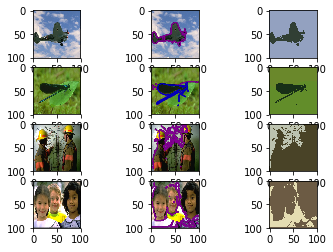

In [3]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import cv2


images = ["3063.jpg", "35070.jpg", "23084.jpg", "368037.jpg"]

new_size = (100, 100)
temp = np.arange(1, new_size[0] + 1, dtype=np.int32)
x_mesh, y_mesh = np.meshgrid(temp, temp)
mesh = np.stack((x_mesh, y_mesh), axis=-1)
reshaped_mesh = mesh.reshape((-1, 2))
image_ind = 0

for image_name in images:
    img = cv2.imread(image_name)
    resized_img = cv2.resize(img, new_size)

    reshaped_img = resized_img.reshape((-1, 3))
    max_score = -1

    for no_of_clusters in range(2, 13):
        sc = SpectralClustering(n_clusters=no_of_clusters, affinity='nearest_neighbors', n_neighbors=10)

        X = np.empty((reshaped_img.shape[0], 5), dtype=np.int64)
        for i in range(reshaped_img.shape[0]):
            X[i] = np.concatenate((reshaped_img[i], reshaped_mesh[i]))

        res = sc.fit_predict(X)

        score = silhouette_score(X, res)
        if score >= max_score:
            max_score = score
            max_res = res
            max_no_of_clusters = no_of_clusters

    print(max_no_of_clusters, "clusters for", image_name)
    val = np.zeros((max_no_of_clusters, 3), dtype=np.int64)
    cnt = np.zeros(max_no_of_clusters)
    for i in range(reshaped_img.shape[0]):
        val[max_res[i]] += reshaped_img[i]
        cnt[max_res[i]] += 1

    for i in range(max_no_of_clusters):
        val[i] = val[i] // cnt[i]

    final_res = np.empty((max_res.shape[0], 3), dtype=np.uint8)
    for i in range(max_res.shape[0]):
        final_res[i] = val[max_res[i]]

    final_res = final_res.reshape((new_size[0], new_size[1], 3))
    max_res = max_res.reshape(new_size)

    plt.subplot(len(images), 3, 3 * image_ind + 1)
    plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
    plt.subplot(len(images), 3, 3 * image_ind + 2)
    plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
    for i in range(max_no_of_clusters):
        plt.contour(max_res == i, colors=[plt.cm.nipy_spectral(i / float(no_of_clusters))], linewidths=0.5)
    plt.subplot(len(images), 3, 3 * image_ind + 3)
    plt.imshow(cv2.cvtColor(final_res, cv2.COLOR_BGR2RGB))
    image_ind += 1

plt.savefig("SpectralClustering.jpg")
plt.show()